# G.G, Good Game! Investigating the Structural Characteristics that Make Highly-Rated Video Games

# Notebook 4 - Modeling


&nbsp;

**By: [Lae Rivera](https://github.com/laerivera)**

**BrainStation Data Science**

**April 4, 2022**

In this notebook, I will continue my preparation for the implementation of Natural Language Processing (NLP) and Machine Learning techniques. The processes outlined in this notebook includes: separating the documents into separate 'tokens' through a custom tokenizer, defining variables, establishing performance metrics, and finally, fitting my models.


***

## Notebook Contents

1. [**Create Custom Tokenizer**](#d1)<br>
    1.1 [Implement Stemmer](#d1.1)<br>
    1.2 [Remove Punctuation](#d1.2)<br>
    1.3 [Remove Stopwords](#d1.3)<br>
    1.4 [Final Tokenizer](#d1.4)<br>
    
2. [**Define Dependent and Independent Variables**](#d2)<br>
    2.1 [Train/Test Split](#d2.1)<br>
    2.2 [Distribution of Target Variable](#d2.2)<br>
    
3. [**Vectorizers Used**](#d3)

4. [**Establish Performance Baseline**](#d4)<br>
    3.1 [Dummy Classifier (TF-IDF)](#d4.1)<br>
    3.2 [Dummy Results](#d4.2)<br>
    
5. [**Helper Function: Model File Loader**](#d5)<br>

6. [**Modeling**](#d6)<br>

7. [**Grid Search 1: Control**](#d7)<br>
    6.1 [GridSearch 1 Results](#d7.1)<br>
    6.2 [GridSearch 1 Summary](#d7.2)<br>
    
8. [**Grid Search 2: Ngrams**](#d8)<br>
    7.1 [GridSearch 2 Results](#d8.1)<br>
    7.2 [GridSearch 2 Summary](#d8.2)<br>
    
9. [**Grid Search 3: Feature Engineering**](#d9)<br>
    8.1 [Creating Features](#d9.1)<br>
    8.2 [GridSearch 3 Results](#d9.2)<br>
    8.3 [GridSearch 3 Summary](#d9.3)<br>
    
10. [**Grid Search 4: Feature Engineering - Wider Range**](#d10)<br>
    9.1 [GridSearch 4 Results](#d10.1)<br>
    9.2 [GridSearch 4 Summary](#d10.2)<br>
    
11. [**Model Summary**](#d11)<br>

***

**Importing Libraries**

In [1]:
# Importing libraries

# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# NLP 
import nltk
import string
import scipy.sparse

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

# Dummy 
from sklearn.dummy import DummyClassifier

# Models
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Loading Data**

In [2]:
# Load data
games = joblib.load('data/games.pkl')
games_clean = joblib.load('data/games_clean.pkl')

***

## Create Custom Tokenizer<a id="d1"></a>

To get my model to understand the text data I would need to tokenize it, but first, here are a list of definitions that will be used moving forward:


| Term  | Definition| |
| -------| -------- | --- |
|**Corpus** |           | The entire collection of individual text files in the whole dataset. | |
|**Document** |           | A single or individual text file. | |
|**Token** |           | Processed words from the document; can be multiple words. | |
|**Vocabulary** |           | Collection of the tokens from the corpus. | |


&nbsp;


This process essentially breaks down the individual documents into a sequence of tokens (individual/paired words depending on settings). What I am performing here is **feature extraction**——by obtaining certain features from a corpus that models will do analysis on.

**Workflow**:
- Implement Stemmer
- Remove Punctuation
- Remove Stopwords
- These steps will go into a custom tokenizer so the steps are all together. This makes things more efficient and simple. 

**Sources**:
- [nltk](https://www.nltk.org/)
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
-[TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

***

### Stemmer <a id="d1.1"></a>

Before I fit the model, I will be calling a stemming function from Porter Stemer (nltk). This will cut off word-ends to lower the word to its basic root. We will be adding this process to the "tokenizer" parameter of the vectorizers.

In [3]:
# importing stemmer
stemmer = nltk.stem.PorterStemmer()

### Removing Punctuation <a id="d1.2"></a>

This returns a list of common punctuations. We will include this into the tokenizer. We want to remove these as it does not really serve significant value to our predicted score. 

In [4]:
# import string & lists punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


This returns a list of the most common punctuations. This is to show me what types will be removed.

### Stopwords <a id="d1.3"></a>

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords

ENGLISH_STOP_WORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laerivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print("List of English Stop Words:")
print(ENGLISH_STOP_WORDS)

List of English Stop Words:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'o

***

### Final Tokenizer <a id="d1.4"></a>

This tokenizer will be included during vectorization that will run my steps accordingly: remove punctuation, set letters to lowercase, split the sentences into words, remove stop words, stem the words.

In [7]:
 def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

***

## Define Dependent/Independent Variables  <a id="d2"></a>

In [8]:
# Define X and y
X = games['summary']
y = games['meta_score']

In [9]:
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (17776,)
y Shape: (17776,)


In [10]:
X

0        As a young boy, Link is tricked by Ganondorf, ...
1        As most major publishers' development efforts ...
2         What does the American Dream mean today? For ...
3        This is a tale of souls and swords, transcendi...
4         What does the American Dream mean today? For ...
                               ...                        
17771    Fast & Furious: Showdown takes some of the fra...
17772    Drake is out for revenge in a supernatural Hon...
17773    Head out on a journey of redemption, driven by...
17774     It has been 5 years since the outbreak, givin...
17775    The Leisure Suit Larry: Box Office Bust video ...
Name: summary, Length: 17776, dtype: object

In [11]:
y.unique()

array([1, 0])

My X/dependent variable will be the 'summary' as I am going to do some natural language processing. The y/independent variable will be the 'meta score'.

---

## Train/Test Split <a id="d2.1"></a>

To begin our preparing for NLP machine learning models, I need to split my test and train data before vectorizing it. The split is done to identify our train and test data, which the model will be fitted and evaluated on. This is an extremely important step to the machine learning process. It ensures that overfitting is reduced and that our model can generlize itself better to new data that is introduced. This is important especially if this model will be used in real use cases. Splitting is also done before vectorizing the text data to prevent data leaks.


In [12]:
# Setting test size to 20%, and training at 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (14220,)
X_test Shape: (3556,)


In [14]:
# Looking at Xtrain
X_train

10851    TEAM-BASED SPACE COMBAT - Select from a variet...
4178     A new generation of Pokémon has come to the Ni...
5887     Age of Wonders: Planetfall is the new strategy...
129      Master deep, tactical combat. Join up to 3 oth...
8629     Chariot is a humoristic physics-based couch co...
                               ...                        
10955    A turn-based tactical RPG about a group of tro...
17289    Take on the roll of Scarlett as you develop an...
5192     Tensions mount for Mario and pals as each decl...
12172    Taking a small step into the future, Red River...
235      Drop in and conquer the massive, living mounta...
Name: summary, Length: 14220, dtype: object

In [15]:
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

y_train Shape: (14220,)
y_test Shape: (3556,)


## Distribution: Target Variable <a id="d2.2"></a>

In [16]:
# Check distribution for y sets
y_train_dist = round(y_train.value_counts(normalize=True).sort_index()*100, 2)
y_test_dist = round(y_test.value_counts(normalize=True).sort_index()*100, 2)

In [17]:
# Checking the datatypes
type(y_train_dist)

pandas.core.series.Series

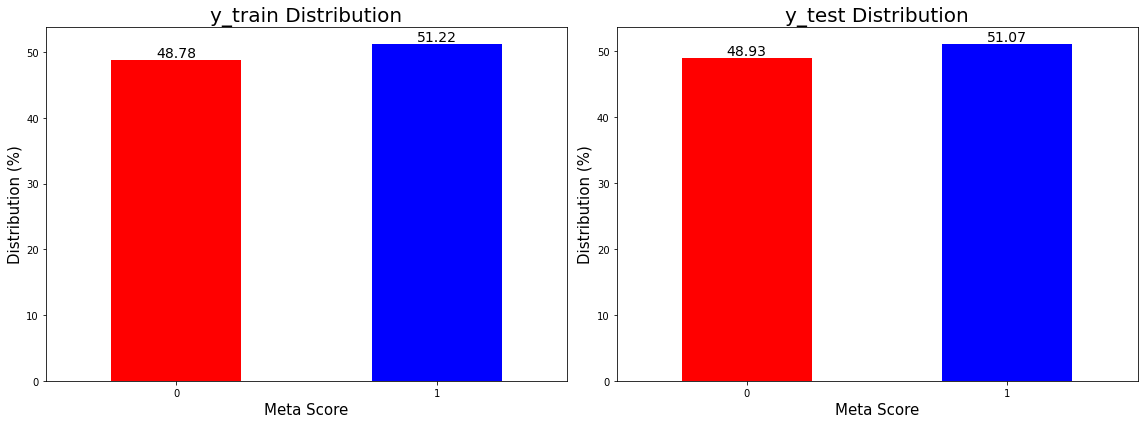

In [18]:
# Plotting the y Distribution
plt.subplots(1, 2, figsize=(16,6))  # one row, two columns (1x2 grid)

plt.subplot(1, 2, 1)  # slot 1
y_train_d = y_train_dist.plot.bar(color=['red', 'blue'])
plt.title('y_train Distribution', fontsize=20)
plt.xlabel('Meta Score', fontsize=15)
plt.ylabel('Distribution (%)', fontsize=15)
plt.xticks(rotation = 360)
plt.bar_label(y_train_d.containers[0], size=14)


plt.subplot(1, 2, 2)  # in my 1x2 grid of plots, what's in slot 2?
y_test_d = y_test_dist.plot.bar(color=['red', 'blue'])
plt.title('y_test Distribution', fontsize=20)
plt.xlabel('Meta Score', fontsize=15)
plt.ylabel('Distribution (%)', fontsize=15)
plt.xticks(rotation = 360)
plt.bar_label(y_test_d.containers[0], size=14)

# comment out the following line and run cell to see the difference it makes
plt.tight_layout()  # makes sure there is no overlap in plots

plt.savefig('data/modelydists.jpg') #save file
plt.show()

As we can see, the distribution for the y_test and y_train after splitting is still very balanced. This is very good news since a balance in the target variable ensures there are no biases when the model is making predictions (prefers one class over the other). I will not need to deal with class imbalance later on. 

***

# Vectorizers Used <a id="d3"></a>


**TF-IDF Vectorizer**: TF-IDF is composed of two different steps:
1. Term Frequency (TF): This essentially returns the number of occurences a word has in a document (like document-term matrix);
2. Inverse Document Frequency (IDF): This returns the inverse of the number of documents the word occurs in.

Basically, words that are more common across the entire document will have a scaled-down count while words that are less common across the document will have a scaled-up count. Words that are less common will be focused on when trying to make predictions.

**Count-Vectorizer (Bag-of-Words)**: is a type of tokenizer where each individual word in the corpus is counted by the number of times it occurs in each document. The result is a document-term matrix, where each column is each unique word (token) and the rows will correspond to the document.


Sources:

[TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

[Count-Vectorizer](https://en.wikipedia.org/wiki/Bag-of-words_model)

***

# Establishing Performance Baseline <a id="d4"></a>

**Since the distribution of my predicted variable was already well-balanced, I am not worried about class imbalance, and thus using the **accuracy** score of the models instead of *f1 score* will be used for scoring.**

### Dummy Classifier (TF-IDF) <a id="d4.1"></a>

To assess the performance of later models done, I want to establish a *baseline* that I can compare future models to. I will be using a **Dummy Classifier** since it will attempt to make predictions without looking for patterns. A balance in class (that I mentioned earlier) ensures there are no biases when the model is making predictions.


**Documentation and Sources**: 

[Dummy Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

[*Why Dummy Classifier is Important*](https://stackoverflow.com/questions/29441943/what-is-the-theorical-foundation-for-scikit-learn-dummy-classifier)

***

**Separate TF-IDF Vectorizer only for Dummy Classifier**

Since I do not want to include my Dummy Classifier in my GridSearchCV (to keep things separated), I will be vectorizing the data separately. I will implement a min_df of 5 as well as implement my custom tokenizer created earlier in the notebook.

*Note*: There is a warning saying the "token_pattern will not be used". This is normal because I used my own tokenizer. I can ignore this without problem.

In [19]:
# Note: I do not want the dummy in the pipeline so I will create a separate vectorizer

# Instantiate tfidf vectorizer for dummy only
tfidf_dummy = TfidfVectorizer(min_df=5, # min_df is set to reduce noise
                        tokenizer=my_tokenizer) # my custom tokenizer

# Fit tfidf vectorizer
tfidf_dummy.fit(X_train)

# Transform
X_train_dummy_t = tfidf_dummy.transform(X_train)
X_test_dummy_t = tfidf_dummy.transform(X_test)

/Users/laerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [20]:
print(f" Shape of X_train Dummy: {X_train_dummy_t.shape}")

 Shape of X_train Dummy: (14220, 9400)


In [21]:
# Instantiate dummy classifier
baseline = DummyClassifier() 
baseline.fit(X_train_dummy_t, y_train)

# Make predictions
y_pred_baseline_t = baseline.predict(X_test_dummy_t)

### Dummy Results <a id="d4.2"></a>

In [22]:
# Print accuracy score
print(f"Dummy Accuracy Score (%): {round(accuracy_score(y_test, y_pred_baseline_t)*100, 2)}")

Dummy Accuracy Score (%): 51.07


**Dummy Classification Report**

Although I will not be using a classification report, and will merely use the accuracy score, I will use it here for demonstration.

In [23]:
# Classification Report 

print_line = "\n=======================================================\n"
print("Classification Report: Dummy Classifier", print_line)
class_report_baseline = classification_report(y_test, y_pred_baseline_t)
print(class_report_baseline)
print(print_line)

Classification Report: Dummy Classifier 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1740
           1       0.51      1.00      0.68      1816

    accuracy                           0.51      3556
   macro avg       0.26      0.50      0.34      3556
weighted avg       0.26      0.51      0.35      3556





/Users/laerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Dummy Confusion Matrix**

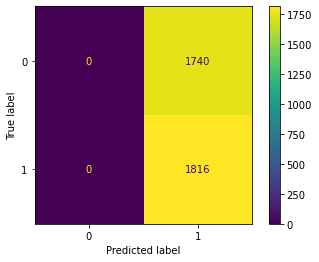

In [24]:
plot_confusion_matrix(baseline, X_test_dummy_t, y_test)

In [25]:
print("Dummy Distribution")
dummy_train = round(y_train.value_counts(normalize=True).sort_index()*100, 2)
dummy_train

Dummy Distribution


0    48.78
1    51.22
Name: meta_score, dtype: float64

&nbsp;

Based on the confusion matrix, we can see that the dummy classifier predicted all '1'/'good' game scores. This gives it a **0.51 (51%) accuracy score**. This is consistent with the distribution of prediction of y='1'. This shows that the if the dummy predicted all 1's it will always get an accuracy score of 0.51. 

Models will aim to be above this 51% accuracy score. This ensures that the models are operating better than merely random guessing.

***

# Helper Function: Model File Loader <a id="d5"></a>

Due to the long execution times, I will use a customized helper function by [Andrew Dang](https://github.com/andrew-dang) to reduce running models when it is already saved in a `.pkl` file.

In [26]:
def load_fitted_models():
    '''
    Function that loads fitted models and sets the model_loaded_flag to True. 
    Saves readers the trouble of having to fit all the models every time they open the notebook.
    
    INPUT:
    ------
    None
    
    OUTPUT:
    -------
    model_dict: a dictionary that contain fitted models
    models_loaded_flag: A boolean. If set to True, most models in the notebook will not undergo 
                        fitting, and load models from the dictionary instead.

    '''
    
    model_dict = {} # Filling in dictionary with models
    model_dict['gs1'] = joblib.load('data/fitted_gridsearchcv1.pkl')
    model_dict['gs2'] = joblib.load('data/fitted_gridsearchcv2.pkl')
    model_dict['gs3'] = joblib.load('data/fitted_gridsearchcv3.pkl')
    model_dict['gs4'] = joblib.load('data/fitted_gridsearchcv4.pkl')
    
    models_loaded_flag = True # set to false if re-executing the training of models
    return model_dict, models_loaded_flag


In [27]:
# Load the fitted models
model_dict, models_loaded_flag = load_fitted_models()

***

# Modeling <a id="d6"></a>

Now it's time to use GridSearchCV to find the most optimal model and hyperparameter. 
- *Note*: Standard and MinMax Scalers will *not* be done. Since most of my data is binary, implementing a scaler will be redundant and inappropriate. 

**Classifiers to run**:
1. Logistic Classifier
2. KNN Classifiers
4. Decision Tree Classifier
5. Random Forest Classifier

***
**Workflow**:

[**Grid Search 1: Control**](#d7)<br>
In GridSearch 1, I will be implementing Logistic, K-NearestNeighbors , Decision Tree, and Random Forest Classifiers. The results will be analyzed and I will proceed with the modeling process until the results are conclusive and satisfactory


[**Grid Search 2: Ngrams**](#d8)<br>
Based on the results of GridSearch 1, I will implement N-grams (specifically bigrams) to the analysis to observe how it affects the model performance.


[**Grid Search 3: Feature Engineering**](#d9)<br>
Based on the results of GridSearch 2, I will do some feature engineering to observe the affects the model performance.


[**Grid Search 4: Feature Engineering - Expand Parameters**](#d10)<br>
Based on the results of GridSearch 3, I will replicate GridSearch 3 and widen the parameter range to get the most optimized result. 


---

## GridSearch 1 - The Control <a id="d7"></a>


**Fitted Models**:
- Logistic Classifier
- KNN Classifier
- Decision Tree Classifier
- Random Forest Classifier

**Vectorizers**:
- TF-IDF, Count Vectorizers

**Run-time**: 21 minutes

***Notes GridSearch 1***:
- The `C` hyperparameter affects regularization (penalty)-where the smaller 'C' is, the stronger regularization will be applied. The warnings merely indicate that when the penalty is set to 'None', then the C will be ignored. 
- Max_iter is specified to allow the logistic regression to converge.
---

**GridSearch 1**

In [28]:
if models_loaded_flag: # SOURCE: Andrew Dang
    print('Loading pre-trained model...')
    gs1 = model_dict['gs1'] # reference the pkl if flag is set to True
    
    # Print the best estimator
    print('\nThe best model used the following settings:', '\n',gs1.best_estimator_)
    
    # Print score 
    print(f"Best Model Train Score (%): {round(gs1.score(X_train, y_train)*100.00, 2)}") #train score
    print(f"Best Model Test Score (%): {round(gs1.score(X_test, y_test)*100.00,2)}") # test score
    
#------------------------------------------------------------------------------------------------------------------#

else: 

    # State Models will re-train
    print("Training Models...")

    # GRIDSEARCH 1: 

    estimators1 = [('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())]


    pipe1 = Pipeline(estimators1)

    # Instantiate Pipeline with the specified steps
    param_grid1 = [

    # Logistic Classifier
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer)],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10], # C parameters
                'model__penalty': ['l2', 'none'],  # penalty applied
                'model__max_iter': [10000], # max iterations is set to higher value to make sure lines converge
                'model__random_state': [1]}, # random state
    # # KNN
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer)],
                 'model': [KNeighborsClassifier()],
                 'model__n_neighbors': range(3, 10)},

    # # Decision Tree Classifier
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer)],
                'model': [DecisionTreeClassifier()],
                'model__max_depth': range(2, 6), #limits number of splits made/complexity
                'model__min_samples_leaf':[2], #places lower bound on number of datapoints each region covers
                'model__random_state': [1]},

    # # Random Forest
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer)],
                 'model': [RandomForestClassifier()],
                 'model__max_depth': range(2, 6),
                 'model__min_samples_leaf':[2],
                 'model__random_state': [1]},
                    ]

    # Instate cross-validated grid search object
    grid1 = GridSearchCV(
        estimator = pipe1, # define estimator
        param_grid = param_grid1, # define parameter 
        cv = 5, # cross validation folds
        verbose = 0,
        n_jobs = -1
    )

    # Fit the GridSearch
    fitted_grid1 = grid1.fit(X_train, y_train) # Fit grid to train sets

#------------------------------------------------------------------------------------------------------------------#    
    
    # Saving GridSearch 1 as a pickle file
    grid_search_model = fitted_grid1
    joblib.dump(fitted_grid1, 'data/fitted_gridsearchcv1.pkl')
    # Setting variable
    gs1 = joblib.load('data/fitted_gridsearchcv1.pkl' ) # NOTE: Unusual, but doing the loading first before calling best estimator/scores since run times are quicker for me
    
    
    # Best Estimator of GridSearch
    print(gs1.best_estimator_)
    
    # Print Score
    print(f"Best Model Train Score (%): {round(gs1.score(X_train, y_train)*100.00, 2)}") # best train score
    print(f"Best Model Test Score (%): {round(gs1.score(X_test, y_test)*100.00,2)}") # best test score


Loading pre-trained model...

The best model used the following settings: 
 Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 tokenizer=<function my_tokenizer at 0x7fca129c9550>)),
                ('model', KNeighborsClassifier(n_neighbors=3))])
Best Model Train Score (%): 95.69
Best Model Test Score (%): 71.23


***

#### GridSearch 1 Results <a id="d7.1"></a>

**GridSearch 1**

Here, the Top 10 Scores (ranked by mean test score) are organized into a dataframe. This allows me to view the results. 

In [29]:
pd.set_option('display.max_colwidth', None) #set dataframes with expanded columns to view full parameters

# Show results in a dataframe
gs1_results_df = pd.DataFrame(gs1.cv_results_).sort_values('mean_test_score', ascending=False) #rank by mean_test_score
gs1_results = gs1_results_df[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False) # Order by highest mean_test_score/5 fold cross validation
print("GridSearch 1 Cross Validation Results")
gs1_results.head(10) # top 10 cv results

GridSearch 1 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
20,1,"{'model': KNeighborsClassifier(n_neighbors=3), 'model__n_neighbors': 3, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.684529,0.020900
13,2,"{'model': LogisticRegression(), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.675035,0.010733
16,3,"{'model': LogisticRegression(), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.673840,0.012000
2,4,"{'model': LogisticRegression(), 'model__C': 0.001, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
18,4,"{'model': LogisticRegression(), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
6,4,"{'model': LogisticRegression(), 'model__C': 0.01, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
14,4,"{'model': LogisticRegression(), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
10,4,"{'model': LogisticRegression(), 'model__C': 0.1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
17,9,"{'model': LogisticRegression(), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672855,0.008660
11,10,"{'model': LogisticRegression(), 'model__C': 0.1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.667792,0.008787


&nbsp;

#### GridSearch 1 Summary <a id="d7.2"></a>

- GridSearch 1 gave us a Best Model Train Score of 95% and a test score of **71.23%**. These scores show that the model has trained very well but did not generalize well with the unseen (test) data. This means the model is **over-fitting** quite a bit despite applying a 5-fold cross validation. However, it is good to note that this is roughly 20% higher than that of the dummy score of 51%.


- The main purpose of my project is to predict whether a game has a "high" or "low" meta score based on the game characteristics. However, due to the nature of the optimal model for GS1, the KNN Classifier is **difficult to interpret**. For example, with a Logistic Regression, the tokens itself are attached to coefficients that would tell me where the features contribute more to a high or low score. The same cannot be done with a KNN model. With a KNN model, I will not necessarily know the relationship between the words to a game score since the way it measures is by a type of "distance" (not coefficient) Due to the **conflicting purpose of the best model and the purpose of my business question**, I will remove KNN from future models/GridSearch.

- Furthermore, when looking at the cross validation scores outlined in "GridSearch 1 Cross Validation Scores", we can see a higher amount of standard test scores for the most optimal KNN compared to the most optimal Logistic Regression classifier. In other words, the KNN model has more volatility. 

***

## GridSearch 2 - Ngrams <a id="d8"></a>

After fitting my first GridSearch and determining that KNN was difficult to interpret in regard to my project purpose, I have removed it for GridSearch 2. In this GridSearch, I will be adding Ngrams to the vectorizer. Ngrams are essentially pairs of consecutive words that help maintain the sequence and interpretability of the token. In this case, I will apply a bigram (2-gram).

**Fitted Models**:
- Logistic Classifier
- Decision Tree Classifier
- Random Forest Classifier

**Vectorizers**:
- TF-IDF, Count Vectorizers, **Bigrams** 

***Runtime:***
- 40 minutes

**Source**:

[Ngrams](https://pythonhosted.org/ngram/ngram.html)

---

**GridSearch 2**

In [30]:
if models_loaded_flag:  #Helper Function
    print('Loading pre-trained model...')
    gs2 = model_dict['gs2'] # reference the pkl
    
    # Print the best estimator
    print('\nThe best model used the following settings:', '\n',gs2.best_estimator_)
    
    # Print score 
    print(f"Best Model Train Score (%): {round(gs2.score(X_train, y_train)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs2.score(X_test, y_test)*100.00,2)}")
    
#------------------------------------------------------------------------------------------------------------------#

else:
    
    # State Models will re-train
    print("Training Models...")

    # GRIDSEARCH 2:

    estimators2 = [('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())]


    pipe2 = Pipeline(estimators2)

    # Instantiate Pipeline with the specified steps
    param_grid2 = [

    # Logistic Classifier
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer),
                                TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2)), # adding bigrams
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2))
                               ],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'model__penalty': ['l2', 'none'],
                'model__max_iter': [10000],
                'model__random_state': [1]},

    # # Decision Tree Classifier
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer),
                               TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2)), # adding bigrams
                               CountVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2))
                               ],
                'model': [DecisionTreeClassifier()],
                'model__max_depth': range(2, 6), #limits number of splits made/complexity
                'model__min_samples_leaf':[2], #places lower bound on number of datapoints each region covers
                'model__random_state': [1]},

    # # Random Forest
                {'vectorizer': [TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer),
                               TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2)), # adding bigrams
                                CountVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range=(2, 2))
                               ],
                 'model': [RandomForestClassifier()],
                 'model__max_depth': range(2, 6),
                 'model__min_samples_leaf':[2],
                 'model__random_state': [1]},
                    ]

    # Instate cross-validated grid search object
    grid_2 = GridSearchCV(
        estimator = pipe2,
        param_grid = param_grid2,
        cv = 5, # cross validation folds
        verbose = 0,
        n_jobs = -1
    )

    # Fit the GridSearch 
    fitted_grid2 = grid_2.fit(X_train, y_train)
    
    
#------------------------------------------------------------------------------------------------------------------# 
    
    # Saving GridSearch 2 as a pkl
    gs2 = fitted_grid2
    joblib.dump(fitted_grid2, 'data/fitted_gridsearchcv2.pkl')
    # Setting variable
    gs2 = joblib.load('data/fitted_gridsearchcv2.pkl' ) # NOTE: Unusual, but doing the loading first before calling best estimator/scores since run times are quicker for me
    
    
    # Best Estimator of GridSearch
    print(gs2.best_estimator_)
    
    # Print Score
    print(f"Best Model Train Score (%): {round(gs2.score(X_train, y_train)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs2.score(X_test, y_test)*100.00,2)}")
    

Loading pre-trained model...

The best model used the following settings: 
 Pipeline(steps=[('vectorizer',
                 CountVectorizer(min_df=5,
                                 tokenizer=<function my_tokenizer at 0x7fca129c9550>)),
                ('model',
                 LogisticRegression(C=1, max_iter=10000, random_state=1))])
Best Model Train Score (%): 91.65
Best Model Test Score (%): 68.81


***

#### GridSearch 2 Results <a id="d8.1"></a>

In [31]:
gs2_results_df = pd.DataFrame(gs2.cv_results_).sort_values('mean_test_score', ascending=False) #create df and arrange by score
gs2_results = gs2_results_df[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False) # Order by highest mean_test_score/5 fold cross validation
print("GridSearch 2 Cross Validation Results")
gs2_results.head(10) #first 10 rows

GridSearch 2 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
25,1,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.675035,0.010733
34,2,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, ngram_range=(2, 2), tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.674191,0.006744
32,3,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.673840,0.012000
27,4,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, ngram_range=(2, 2), tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672996,0.005850
36,5,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
12,5,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 0.01, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
4,5,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 0.001, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
28,5,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
20,5,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 0.1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'vectorizer': TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672925,0.007310
33,10,"{'model': LogisticRegression(C=1, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'vectorizer': CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>)}",0.672855,0.008660


#### GridSearch 2 Summary <a id="d8.2"></a>

- In GridSearch 2, where bigrams were added and the KNN model removed, the best model seemed to be a Logistic Regression Classifier, tokenized with Count Vectorizer, and with a C=1. This model received a **train score of 91.65% and a test score of 68.81%**. Once again, the model is overfitting, which suggests the test is having difficulty generalizing to unknown data.

- The best test score obtained in GridSearch 2 has reduced since GridSearch 1, especially with the removal of the KNN model. Although the score went from ~71% to a 68%, I maintain interpretability since it is a Logistic Regression Classifier with coefficients attached to the tokens.

- In terms of bigrams, I observed that a model with bigrams was ranked 2nd in terms of cross validation score. This test score suggests that the bigrams have helped the model test a little bit, but not enough to be the best performing model——however, it's worth noting that the cross validation score between the best model and the second-best are off only by 0.001%. I was hoping that bigrams would significantly improve model performance, but I was mistaken. Had it suceeded, I would keep it to help me interpret my tokens in the end, but I will take bigrams out for GridSearch 3.

***

## GridSearch 3 - Feature Engineering <a id="d9"></a>

After fitting GridSearch1 and 2, it is clear that the model is overfitting quite largely. I will then exhaust all avenues of improving the test accuracy score in later steps. My plan in GridSearch3 is to add some of the features I discarded earlier and see if that improves the performance of my model. If the features improve the test score, I will keep the new features for my final GridSearch, and if not, I will remove this in the next steps. 

**Fitted Models**:
- Logistic
- DecisionTree
- RandomForest Classifiers
    
**Vectorizers**:
- TF-IDF, Count Vectorizer, **Bigrams Removed**

**Features**:
- Added features include: `game of the year`, `platform`, and `user review` via ColumnTransformer()

**Runtime**: 15 minutes


***

### Adding Features <a id="d9.1"></a>

These are the features I will include: 

- **Platform**: This would tell me if the platform-type of the game released would define whether a game's meta score is low/high.
- **user_review**: User review is another scoring system done by the users. I can investigate whether this can determine a low/high meta score.
- **game_of_the_year**: It would be interesting to see if receiving the MetaCritic's Game of the Year awards contributes highly to a low/high meta score.


&nbsp;

**Create DataFrame Copy**

In [32]:
# Create a copy of the clean dataframe
games_2 = games_clean.copy()

In [33]:
# Check the first few rows
games_2.head(3)

,name,platform,summary,meta_score,user_review,release_year,release_month,game_of_the_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",1,1,1998,11,0
1,Tony Hawk's Pro Skater 2,PlayStation,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.",1,1,2000,9,0
2,Grand Theft Auto IV,PlayStation 3,"What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't.",1,1,2008,4,1


In [34]:
# Keeping the columns I need only
games_2 = games_2.drop(columns=['name', 'release_year', 'release_month'])

In [35]:
games_2.head(3)

,platform,summary,meta_score,user_review,game_of_the_year
0,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",1,1,0
1,PlayStation,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.",1,1,0
2,PlayStation 3,"What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't.",1,1,1


**Defining Variables**

In [36]:
# Define X and y
X2 = games_2.drop(columns=['meta_score'])
y2 = games_2['meta_score']

In [37]:
X2.head(3) # View first 3 rows

,platform,summary,user_review,game_of_the_year
0,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",1,0
1,PlayStation,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.",1,0
2,PlayStation 3,"What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't.",1,1


In [38]:
y2.head(3) # first 3 rows

0    1
1    1
2    1
Name: meta_score, dtype: int64

**Train/Test Split**

In [39]:
# Setting test size to 20%, and training at 80%
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.20, random_state=1) # same random state

In [40]:
print(f"X train 2 shape: {X_train_2.shape}")
print(f"X test 2 shape: {X_test_2.shape}")

X train 2 shape: (14220, 4)
X test 2 shape: (3556, 4)


In [41]:
print(f"y train 2 shape: {y_train_2.shape}")
print(f"y test 2 shape: {y_test_2.shape}")

y train 2 shape: (14220,)
y test 2 shape: (3556,)


***

**GridSearch 3**

In [42]:
if models_loaded_flag: 
    print('Loading pre-trained model...')
    gs3 = model_dict['gs3'] # reference the pkl
    
    # Print the best estimator
    print('\nThe best model used the following settings:', '\n',gs3.best_estimator_)
    
    # Print score 
    print(f"Best Model Train Score (%): {round(gs3.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs3.score(X_test_2, y_test_2)*100.00,2)}")
    
#------------------------------------------------------------------------------------------------------------------#

else:
    
    # State Models will re-train
    print("Training Models...")
    
    
    # GRIDSEARCH 3:

    estimators3 = [('transformer', ColumnTransformer([])),
                ('model', LogisticRegression())]


    pipe3 = Pipeline(estimators3)

    # Instantiate Pipeline with the specified steps
    param_grid3 = [

    # Logistic Classifier
                {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']), #column transformer/tfidfvectorizer
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']), #column transformer/countvectorizer
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10],
                'model__penalty': ['l2', 'none'],
                'model__max_iter': [10000],
                'model__random_state': [1]},

    # # # Decision Tree Classifier
                {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                'model': [DecisionTreeClassifier()],
                'model__max_depth': range(2, 6), #limits number of splits made/complexity
                'model__min_samples_leaf':[2], #places lower bound on number of datapoints each region covers
                'model__random_state': [1]},

    # # # Random Forest
               {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                 'model': [RandomForestClassifier()],
                 'model__max_depth': range(2, 6),
                 'model__min_samples_leaf':[2],
                 'model__random_state': [1]},
                     ]

    # Instate cross-validated grid search object
    grid_3 = GridSearchCV(
        estimator = pipe3,
        param_grid = param_grid3,
        cv = 5, # cross validation folds
        verbose = 0,
        n_jobs = -1
    )

    # fit the grid 
    fitted_grid3 = grid_3.fit(X_train_2, y_train_2)

#------------------------------------------------------------------------------------------------------------------# 

# Saving GridSearch 3 as a pickle file
   
    #gs3 = fitted_grid3
    joblib.dump(fitted_grid3, 'data/fitted_gridsearchcv3.pkl')
    # Setting variable
    gs3 = joblib.load('data/fitted_gridsearchcv3.pkl' ) # NOTE: Unusual, but doing the loading first before calling best estimator/scores since run times are quicker for me
    
    
    # Best Estimator of GridSearch
    print(gs3.best_estimator_)
    
    # Print Score
    print(f"Best Model Train Score (%): {round(gs3.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs3.score(X_test_2, y_test_2)*100.00,2)}")


Loading pre-trained model...

The best model used the following settings: 
 Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('platform_transform',
                                                  OneHotEncoder(),
                                                  ['platform']),
                                                 ('summary_transform',
                                                  CountVectorizer(min_df=5,
                                                                  tokenizer=<function my_tokenizer at 0x7fca129c9550>),
                                                  'summary')])),
                ('model',
                 LogisticRegression(C=10, max_iter=10000, random_state=1))])
Best Model Train Score (%): 96.58
Best Model Test Score (%): 69.52


---

#### GridSearchCV 3 Results <a id="d9.2"></a>

In [43]:
gs3_results_df = pd.DataFrame(gs3.cv_results_).sort_values('mean_test_score', ascending=False)
gs3_results = gs3_results_df[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False) # Order by highest mean_test_score/5 fold cross validation
print("GridSearch 3 Cross Validation Results")
gs3_results.head(10)

GridSearch 3 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
17,1,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.675035,0.008078
13,2,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.674473,0.008927
16,3,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.673699,0.012215
18,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.671941,0.009624
6,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.01, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.671941,0.009624
14,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.671941,0.009624
10,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.671941,0.009624
2,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.001, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.671941,0.009624
3,9,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.001, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.669409,0.010187
19,9,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVecto

#### GridSearchCV 3 Summary <a id="d9.3"></a>

- Interesting! The addition of the new features made it to the best model which is a Logistic Classifier, Count-vectorized, with a C=10. The test score improved nearly a percent more from ~68.8% to ~69.5%. This is some small good news. The std test score of the best model also seems to be quite low, which signifies less variance with the cross validation folds.

- Now that we established that the addition of new features has helped the model performance and accuracy, I will run my last GridSearch with more parameter ranges.

***

## GridSearch 4 - More Parameter Range <a id="d10"></a>

The GridSearch 4 will be an extension of GridSearch 3, with only a wider range of parameters. The new features were determined to help improve accuracy score and model performance, so these will be kept. The reason I put a wide range of parameters in this GridSearch is because I want to maximize the chance of getting the best model.

**Fitted Models**:
- Logistic
- DecisionTree
- RandomForest Classifiers
    
**Vectorizers**:
- TF-IDF, Count Vectorizer

**Features**:
- Added features include: `game of the year`, `platform`, and `user review` via ColumnTransformer()


**Run-Time**: 30 minutes

***

**GridSearch 4**:

In [44]:
if models_loaded_flag: 
    print('Loading pre-trained model...')
    gs4 = model_dict['gs4'] # reference the pkl
    
    # Print the best estimator
    print('\nThe best model used the following settings:', '\n',gs4.best_estimator_)
    
    # Print score 
    print(f"Best Model Train Score (%): {round(gs4.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs4.score(X_test_2, y_test_2)*100.00,2)}")
    
#------------------------------------------------------------------------------------------------------------------#
    
else:
    # State Models will re-train
    print("Training Models...")
    
    # GRIDSEARCH 4:

    estimators4 = [('transformer', ColumnTransformer([])),
                ('model', LogisticRegression())]


    pipe4 = Pipeline(estimators4)

    # Instantiate Pipeline with the specified steps
    param_grid4 = [

    # Logistic Classifier with new Features
                {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # More C values
                'model__penalty': ['l2', 'none'],
                'model__max_iter': [10000],
                'model__random_state': [1]},

    # # # Decision Tree Classifier
                {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                'model': [DecisionTreeClassifier()],
                'model__max_depth': range(2, 10), #limits number of splits made/complexity
                'model__min_samples_leaf':range(2, 6), #keeping this low to keep interpretability
                'model__random_state': [1]},

    # # # Random Forest
               {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')]),
                 ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', CountVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                 'model': [RandomForestClassifier()],
                 'model__max_depth': range(2, 10),
                 'model__min_samples_leaf': range(2, 6), #keeping this low to keep interpretability 
                 'model__random_state': [1]},
                     ]

    # Instate cross-validated grid search object
    grid_4 = GridSearchCV(
        estimator = pipe4,
        param_grid = param_grid4,
        cv = 5, # cross validation folds
        verbose = 0,
        n_jobs = -1
    )

    # fit the grid 
    fitted_grid4 = grid_4.fit(X_train_2, y_train_2)
    
#------------------------------------------------------------------------------------------------------------------# 

# Saving GridSearch 4 as a pickle file
   
    joblib.dump(fitted_grid4, 'data/fitted_gridsearchcv4.pkl')
    # Setting variable
    gs4 = joblib.load('data/fitted_gridsearchcv4.pkl' ) # NOTE: Unusual, but doing the loading first before calling best estimator/scores since run times are quicker for me
    
    
    # Best Estimator of GridSearch
    print(gs4.best_estimator_)
    
    # Print Score
    print(f"Best Model Train Score (%): {round(gs4.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs4.score(X_test_2, y_test_2)*100.00,2)}")

Loading pre-trained model...

The best model used the following settings: 
 Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('platform_transform',
                                                  OneHotEncoder(),
                                                  ['platform']),
                                                 ('summary_transform',
                                                  CountVectorizer(min_df=5,
                                                                  tokenizer=<function my_tokenizer at 0x7fca129c9550>),
                                                  'summary')])),
                ('model',
                 LogisticRegression(C=10, max_iter=10000, random_state=1))])
Best Model Train Score (%): 96.58
Best Model Test Score (%): 69.52


***
***

#### GridSearch 4 Results <a id="d10.1"></a>

In [45]:
gs4_results_df = pd.DataFrame(gs4.cv_results_).sort_values('mean_test_score', ascending=False)
gs4_results = gs4_results_df[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False) # Order by highest mean_test_score/5 fold cross validation
print("GridSearch 4 Cross Validation Results")
gs4_results.head(10)

GridSearch 4 Cross Validation Results


,rank_test_score,params,mean_test_score,std_test_score
17,1,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.675035,0.008078
13,2,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.674473,0.008927
16,3,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.673699,0.012215
20,4,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 100, 'model__max_iter': 10000, 'model__penalty': 'l2', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.672855,0.008109
2,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.001, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.670816,0.009506
10,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 0.1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.670816,0.009506
22,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 100, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.670816,0.009506
18,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.670816,0.009506
26,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 1000, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), 'summary')])}",0.670816,0.009506
14,5,"{'model': LogisticRegression(C=10, max_iter=10000, random_state=1), 'model__C': 1, 'model__max_iter': 10000, 'model__penalty': 'none', 'model__random_state': 1, 'transformer': ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(), ['platform']), ('summary_transform', TfidfVector

***

#### GridSearch 4 Summary <a id="d10.2"></a>

- The results show the same model in GridSearch 3 made it as the best model in this final GridSearch (Logistic with a C=10). This model achieved a test score of 96.58%, which means the model trained incredibly well. 
- The model then tested with an accuracy score of **69.52%**. This was an improvement from the last model beforehand (68%.81).
- This model is overfitting which leads me to suggest that the test data was having a difficult time generalizing to new data, even with regularization and cross validation applied.

***

# Modeling Summary <a id="d11"></a>

**Compiling Scores**

In [46]:
# Create List
gs_full_results = [['Dummy','Dummy Classifier' ,'',round(accuracy_score(y_test, y_pred_baseline_t)*100, 2)],
                   ['GRIDSEARCH 1', gs1.best_estimator_, round(gs1.score(X_train, y_train)*100.00, 2), round(gs1.score(X_test, y_test)*100.00,2)],
                   ['GRIDSEARCH 2', gs2.best_estimator_, round(gs2.score(X_train, y_train)*100.00, 2), round(gs2.score(X_test, y_test)*100.00,2)],
                   ['GRIDSEARCH 3', gs3.best_estimator_, round(gs3.score(X_train_2, y_train_2)*100.00, 2), round(gs3.score(X_test_2, y_test_2)*100.00,2)], 
                   ['GRIDSEARCH 4', gs4.best_estimator_, round(gs4.score(X_train_2, y_train_2)*100.00, 2), round(gs4.score(X_test_2, y_test_2)*100.00,2)]]

# Create Dataframe
gs_full_df = pd.DataFrame(gs_full_results, columns = ['Title', 'Best_Estimator', 'Best_Train_Score', 'Best_Test_Score'])

In [47]:
# Uncomment the next row to expand the best_estimator row cells
pd.set_option('display.max_colwidth', None)
print("GRIDSEARCH RESULTS SUMMARY")
gs_full_df

GRIDSEARCH RESULTS SUMMARY


,Title,Best_Estimator,Best_Train_Score,Best_Test_Score
0,Dummy,Dummy Classifier,,51.07
1,GRIDSEARCH 1,"(TfidfVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), KNeighborsClassifier(n_neighbors=3))",95.69,71.23
2,GRIDSEARCH 2,"(CountVectorizer(min_df=5, tokenizer=<function my_tokenizer at 0x7fca129c9550>), LogisticRegression(C=1, max_iter=10000, random_state=1))",91.65,68.81
3,GRIDSEARCH 3,"(ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(),\n ['platform']),\n ('summary_transform',\n CountVectorizer(min_df=5,\n tokenizer=<function my_tokenizer at 0x7fca129c9550>),\n 'summary')]), LogisticRegression(C=10, max_iter=10000, random_state=1))",96.58,69.52
4,GRIDSEARCH 4,"(ColumnTransformer(transformers=[('platform_transform', OneHotEncoder(),\n ['platform']),\n ('summary_transform',\n CountVectorizer(min_df=5,\n tokenizer=<function my_tokenizer at 0x7fca129c9550>),\n 'summary')]), LogisticRegression(C=10, max_iter=10000, random_state=1))",96.58,69.52


***

**Save Data**

[Saving DF to Pickle](https://www.codegrepper.com/code-examples/python/python+save+dataframe+to+pkl)

In [48]:
gs_full_df.to_pickle('data/gs_full_df.pkl') # save

***

**Notebook Ending Remarks**

The next notebook will go over the findings, insights, and the results in more detail. See Notebook *5-Findings and Results*.

***